# Machine Vision - Object Detection
Yaman Aburaneh\


# Object Detection using Morphological Image Processing
1. Import the required libraries (cv2, matplotlib, numpy)
2. Load RGB image
3. Apply grayscale filter
4. Apply Gaussian Blur filter to grayscale image
5. Apply Triangular Thresholding to blurred image
6. Apply Canny Edge Detection to Thresholded image
7. Apply Morphological Image Processing techniques ("closing" and "dialation" works best for object detection)
8. Create Contours for the processed image 
9. Count number of contours
10. Plot images and display count results

In [107]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define image path
img_path = 'lego1.png'

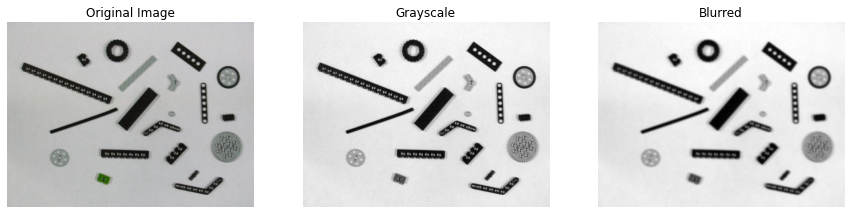

In [93]:
# Load Image using cv2
img = cv2.imread(img_path)                  # Color Image
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # Grayscale filter
blurred = cv2.GaussianBlur(gray, (9, 9), 2) # Gassian Blur filter

# Plot Images
plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1), plt.imshow(img), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred'), plt.axis('off')
plt.show()

Threshold: 176.0


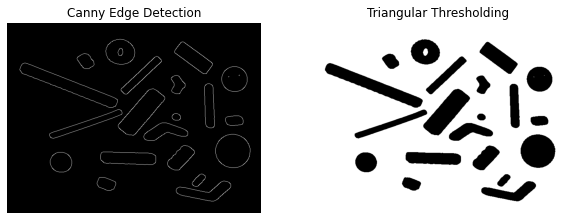

In [124]:
# Triangular Threseholding 
ret, img_masked = cv2.threshold(blurred, 0, 255, cv2.THRESH_TRIANGLE) 
# Apply Canny Edge Detection filter
canny = cv2.Canny(img_masked, 0, ret, 5 ) 
# Print out threshold value
print(f"Threshold: {ret}")  

# Plot images
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1), plt.imshow(canny, cmap='gray'), plt.title('Canny Edge Detection') , plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_masked, cmap='gray'), plt.title('Triangular Thresholding'), plt.axis('off')
plt.show()


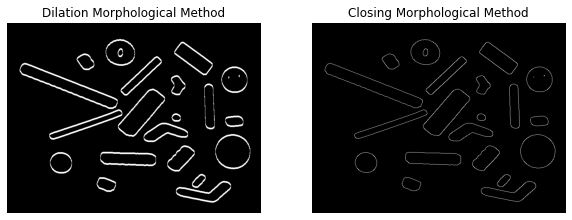

In [113]:
# Apply Morphilogical Operations 
dilation = cv2.dilate(canny , (2,2), iterations=4)       # Dilation Morphological Method
closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE,(4,4)) # Closing Morphological Method

# Plot Images
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1), plt.imshow(dilation, cmap='gray'), plt.title('Dilation Morphological Method'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(closing, cmap='gray'), plt.title('Closing Morphological Method'), plt.axis('off')
plt.show()

Counting using dilation method =  20
Counting using closing method =  20


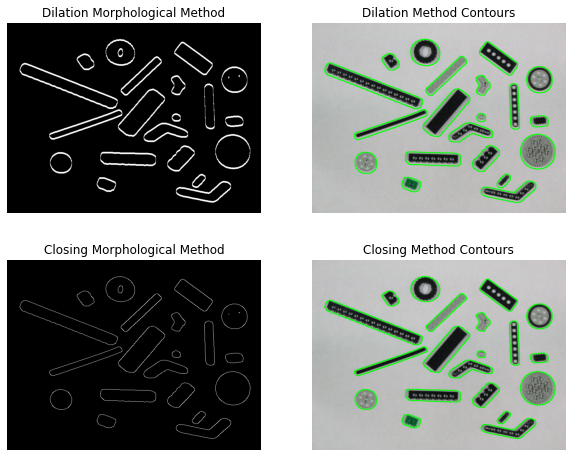

In [114]:
# Create contours for the Dilation Morphological Method
(contour, hierarchy) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, contour, -1, (0, 255, 0), 2)
print("Counting using dilation method = ", len(contour))

# Create contours for the Closing Morphological Method
(contour1, hierarchy) = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb1, contour1, -1, (0, 255, 0), 2)
print("Counting using closing method = ", len(contour1))

# Plot Images
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1), plt.imshow(dilation, cmap='gray'), plt.title('Dilation Morphological Method'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(rgb), plt.title('Dilation Method Contours'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(closing, cmap='gray'), plt.title('Closing Morphological Method'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(rgb1), plt.title('Closing Method Contours'), plt.axis('off')
plt.show()